# OVERVIEW

Zillow publishes several different measures of home values monthly including median list prices, median sale prices, and the Zillow Home Value Index (ZHVI), but for almost all use cases we believe ZHVI to be the most representative measure of changing home values over time.The Zillow Home Value Index dataset has 15530 observations and 19 attributes



# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pyspark

In [2]:
from pyspark.sql import SQLContext

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark=SparkSession.builder.getOrCreate()

In [6]:
from pyspark.ml.regression import LinearRegression

In [7]:
import os
os.getcwd()

'C:\\Users\\PRIYA'

# LOADING THE DATASET

In [8]:
dataset=spark.read.csv("Zip_Zhvi_Summary_AllHomes.csv",inferSchema=True,header=True)

# IMPORTING THE VISUALIZATION LIBRARIES

In [9]:
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# OVERVIEW OF THE DATASET

In [10]:
dataset.show()

+----------+--------+----------+-----+--------------------+--------------------+-------------+--------+-------+------------+------------+------------+------------+-----------+---------+-----------+--------+---------------+------------------+
|      Date|RegionID|RegionName|State|               Metro|              County|         City|SizeRank|   Zhvi|         MoM|         QoQ|         YoY|       5Year|     10Year|PeakMonth|PeakQuarter|PeakZHVI|PctFallFromPeak|LastTimeAtCurrZHVI|
+----------+--------+----------+-----+--------------------+--------------------+-------------+--------+-------+------------+------------+------------+------------+-----------+---------+-----------+--------+---------------+------------------+
|30-04-2019|   61639|     10025|   NY|New York-Newark-J...|     New York County|     New York|       0| 985100|-0.014012611|-0.038739266|-0.122561682| 0.013503559|0.020890961|  2018-01|    2018-Q1| 1137100|    -0.13367338|           2015-05|
|30-04-2019|   84654|     60657|

# DETERMINING THE DATATYPE OF EVERY VARIABLE

In [11]:
dataset.printSchema()

root
 |-- Date: string (nullable = true)
 |-- RegionID: integer (nullable = true)
 |-- RegionName: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- Metro: string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SizeRank: integer (nullable = true)
 |-- Zhvi: integer (nullable = true)
 |-- MoM: double (nullable = true)
 |-- QoQ: double (nullable = true)
 |-- YoY: double (nullable = true)
 |-- 5Year: double (nullable = true)
 |-- 10Year: double (nullable = true)
 |-- PeakMonth: string (nullable = true)
 |-- PeakQuarter: string (nullable = true)
 |-- PeakZHVI: integer (nullable = true)
 |-- PctFallFromPeak: double (nullable = true)
 |-- LastTimeAtCurrZHVI: string (nullable = true)



# DETERMINING THE COUNT OF THE NUMBER OF OBSERBVATIONS IN THE DATASET

In [12]:
dataset.count()

15530

# INDIVIDUALLY DETERMING IN EVERY COLUMN FROM THE COUNT IF THERE ARE ANY NA VALUES

In [13]:
dataset.describe(["RegionID"]).show()

+-------+------------------+
|summary|          RegionID|
+-------+------------------+
|  count|             15530|
|   mean| 80865.11268512557|
| stddev|31925.994587480138|
|    min|             58196|
|    max|            753844|
+-------+------------------+



In [14]:
dataset.describe(["RegionName"]).show()

+-------+------------------+
|summary|        RegionName|
+-------+------------------+
|  count|             15530|
|   mean| 47674.69871216999|
| stddev|29008.767583152603|
|    min|              1001|
|    max|             99901|
+-------+------------------+



In [15]:
dataset.describe(["SizeRank"]).show()

+-------+-----------------+
|summary|         SizeRank|
+-------+-----------------+
|  count|            15530|
|   mean|           7764.5|
| stddev|4483.269175501288|
|    min|                0|
|    max|            15529|
+-------+-----------------+



In [16]:
dataset.describe(["Zhvi"]).show()

+-------+-----------------+
|summary|             Zhvi|
+-------+-----------------+
|  count|            15530|
|   mean|276247.8171281391|
| stddev|268615.7659041131|
|    min|            22100|
|    max|          6342800|
+-------+-----------------+



In [17]:
dataset.describe(["MoM"]).show()

+-------+--------------------+
|summary|                 MoM|
+-------+--------------------+
|  count|               15530|
|   mean|-0.00258999914902...|
| stddev|0.007373227215655761|
|    min|        -0.061562747|
|    max|         0.048888889|
+-------+--------------------+



In [18]:
dataset.describe(["QoQ"]).show()

+-------+--------------------+
|summary|                 QoQ|
+-------+--------------------+
|  count|               15530|
|   mean|2.607239393432049E-4|
| stddev|0.017932271742555038|
|    min|        -0.123893805|
|    max|         0.114382786|
+-------+--------------------+



In [19]:
dataset.describe(["YoY"]).show()

+-------+-------------------+
|summary|                YoY|
+-------+-------------------+
|  count|              15530|
|   mean|0.05117916947849328|
| stddev|0.05164976791216523|
|    min|       -0.226450999|
|    max|        0.371323529|
+-------+-------------------+



In [20]:
dataset.describe(["5Year"]).show()

+-------+--------------------+
|summary|               5Year|
+-------+--------------------+
|  count|               15417|
|   mean|  0.0563919228691055|
| stddev|0.030607285296496336|
|    min|        -0.076058526|
|    max|         0.287891793|
+-------+--------------------+



In [ ]:
#THE COUNT OF 5YEAR IS 15417 WHICH IS LESS THAN THE ACTUAL COUNT OF 15530 INDICATING THAT THE COLUMN HAS NA VALUES

In [21]:
dataset.describe(["10Year"]).show()

+-------+--------------------+
|summary|              10Year|
+-------+--------------------+
|  count|               14865|
|   mean|0.025336420494463534|
| stddev|0.019038923347985875|
|    min|        -0.067949215|
|    max|         0.114871551|
+-------+--------------------+



In [ ]:
#THE COUNT OF 10YEAR IS 14865 WHICH IS LESS THAN THE ACTUAL COUNT OF 15530 INDICATING THAT THE COLUMN HAS NA VALUES

In [22]:
dataset.describe(["PctFallFromPeak"]).show()

+-------+--------------------+
|summary|     PctFallFromPeak|
+-------+--------------------+
|  count|               15530|
|   mean|-0.05032438662060512|
| stddev|  0.0750143753494158|
|    min|        -0.685864936|
|    max|                 0.0|
+-------+--------------------+



# CHANGING THE DATATYPE OF PARTICULAR VARIABLES

In [23]:
from pyspark.sql.types import FloatType

In [24]:
dataset=dataset.withColumn("5Year", dataset["5Year"].cast(FloatType()))

In [25]:
dataset=dataset.withColumn("10Year", dataset["10Year"].cast(FloatType()))

In [26]:
dataset=dataset.withColumn("MoM", dataset["MoM"].cast(FloatType()))

In [27]:
dataset=dataset.withColumn("QoQ", dataset["QoQ"].cast(FloatType()))

In [28]:
dataset=dataset.withColumn("YoY", dataset["YoY"].cast(FloatType()))

In [29]:
dataset=dataset.withColumn("PctFallFromPeak", dataset["PctFallFromPeak"].cast(FloatType()))

# CHECKING IF THE DATATYPES OF ALL THE VARIABLES HAVE BEEN CHANGED SUCCESSFULLY

In [80]:
dataset.printSchema()

root
 |-- Date: string (nullable = true)
 |-- RegionID: integer (nullable = true)
 |-- RegionName: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- Metro: string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SizeRank: integer (nullable = true)
 |-- Zhvi: integer (nullable = true)
 |-- MoM: float (nullable = false)
 |-- QoQ: float (nullable = false)
 |-- YoY: float (nullable = false)
 |-- 5Year: float (nullable = false)
 |-- 10Year: float (nullable = false)
 |-- PeakMonth: string (nullable = true)
 |-- PeakQuarter: string (nullable = true)
 |-- PeakZHVI: integer (nullable = true)
 |-- PctFallFromPeak: float (nullable = false)
 |-- LastTimeAtCurrZHVI: string (nullable = true)



# HANDLING NA VALUES BY SUBSTITUTING THEM WITH 0

In [30]:
dataset=dataset.fillna(0)

# BUILDING A CORRELATION MATRIX

In [31]:
numeric_features = [t[0] for t in dataset.dtypes if (t[1] == 'int' ) or (t[1] == 'float' )]
dataset.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
RegionID,15530,80865.11268512557,31925.994587480138,58196,753844
RegionName,15530,47674.69871216999,29008.767583152603,1001,99901
SizeRank,15530,7764.5,4483.269175501288,0,15529
Zhvi,15530,276247.8171281391,268615.7659041131,22100,6342800
MoM,15530,-0.0025899991509293788,0.007373227219738367,-0.061562747,0.04888889
QoQ,15530,2.607239388992095E-4,0.017932271740162976,-0.123893805,0.11438279
YoY,15530,0.05117916949115502,0.05164976789276924,-0.226451,0.37132353
5Year,15530,0.05598160176070283,0.030870065851969178,-0.07605853,0.2878918
10Year,15530,0.024251506151087534,0.01932021112816583,-0.06794921,0.114871554


In [32]:
from pandas.plotting import scatter_matrix

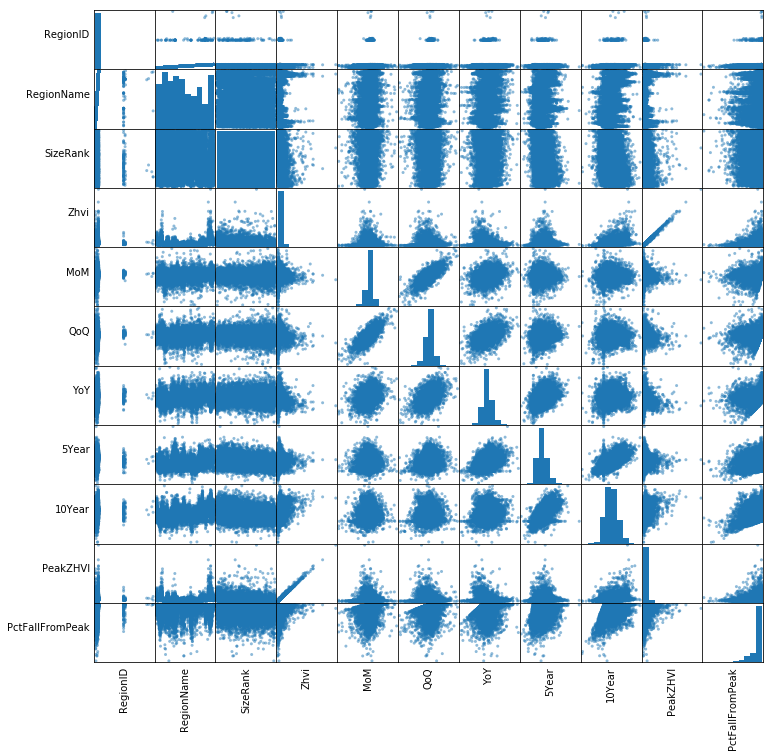

In [33]:
numeric_data = dataset.select(numeric_features).toPandas()
axs = scatter_matrix(numeric_data, figsize=(12, 12));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
#FROM THE ABOVE CORRELATION MATRIX WE INFER THAT THERE IS A LOT OF NON LINEAR CORRELATION BETWEEN MOST OF THE VARIABLES IN THE DATASET

# CREATING A TEMPORARY TABLE

In [34]:
dataset.createOrReplaceTempView("Dataset1")

# EXTRACTING THE RELEVANT COLUMNS BY USING SPARKSQL

In [35]:
result1=spark.sql("select State,PeakZHVI from Dataset1")

In [36]:
result2=result1.groupBy('State').max().collect()

In [37]:
from pyspark.sql.types import *

cSchema = StructType([StructField("State", StringType())\
                      ,StructField("PeakZHVI", IntegerType())])

df = spark.createDataFrame(result2,schema=cSchema) 

# CREATING THE RDDS

In [38]:
resulta=df.rdd.map(lambda row : row.State).collect()


In [39]:
resultb=df.rdd.map(lambda row : row.PeakZHVI).collect()


# PLOTTING THE GRAPH OF PEAKZHVI BY STATE

Text(0.5, 1.0, 'PeakZHVI By State')

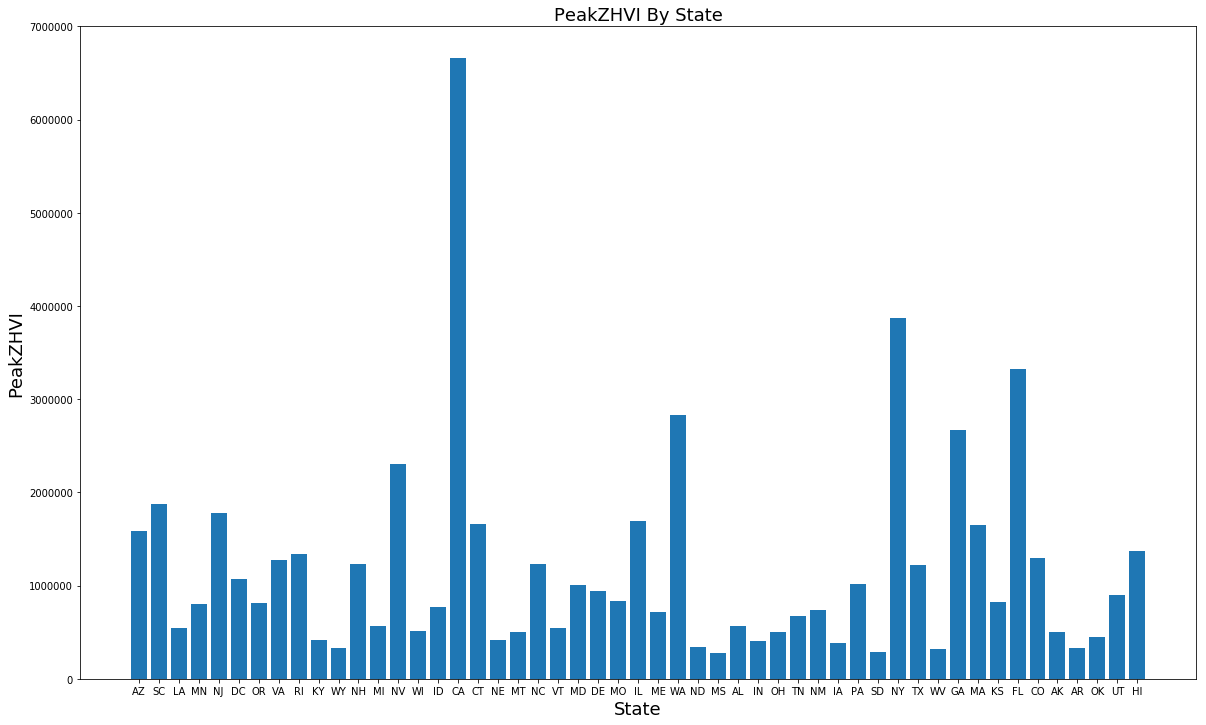

In [40]:
plt.figure(figsize=(20,12))
plt.bar(resulta,resultb)
plt.xlabel("State",fontsize=18)
plt.ylabel("PeakZHVI",fontsize=18)
plt.title("PeakZHVI By State",fontsize=18)

# EXTRACTING THE RELEVANT COLUMNS BY USING SPARKSQL

In [41]:
result3=spark.sql("select PeakZHVI,PeakQuarter from Dataset1 ")

In [42]:
result4=result3.groupBy('PeakQuarter').max().collect()

In [43]:
from pyspark.sql.types import *

cSchema1 = StructType([StructField("PeakQuarter", StringType())\
                      ,StructField("PeakZHVI", IntegerType())])

df1 = spark.createDataFrame(result4,schema=cSchema1) 

In [44]:
df2=df1.sort(df1.PeakZHVI.desc()).collect()

In [45]:
cSchema2 = StructType([StructField("PeakQuarter", StringType())\
                      ,StructField("PeakZHVI", IntegerType())])

df3 = spark.createDataFrame(df2,schema=cSchema2) 

In [46]:
df4=df3.take(10)

In [47]:
from pyspark.sql.types import *

cSchema3 = StructType([StructField("PeakQuarter", StringType())\
                      ,StructField("PeakZHVI", IntegerType())])

df5 = spark.createDataFrame(df4,schema=cSchema3) 

# CREATING THE RDDS

In [48]:
resultc=df5.rdd.map(lambda row : row.PeakQuarter).collect()

In [49]:
resultd=df5.rdd.map(lambda row : row.PeakZHVI).collect()

# PLOTTING THE GRAPH OF PEAKZHVI BY PEAKQUARTER

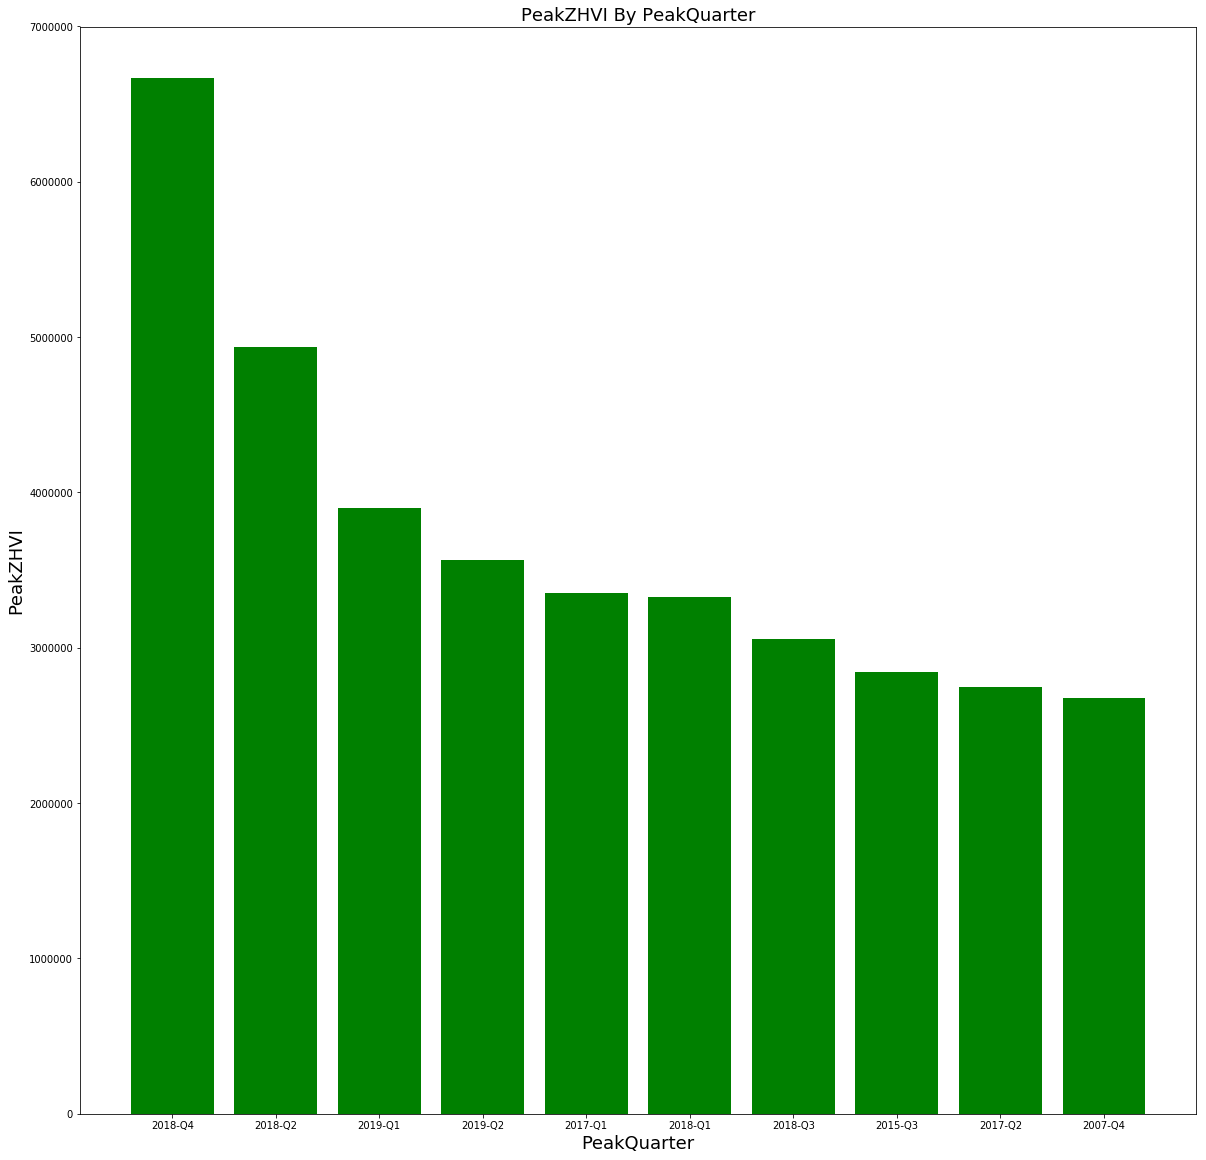

In [125]:
plt.figure(figsize=(20,20))
plt.bar(resultc,resultd,color=["green"])
plt.xlabel("PeakQuarter",fontsize=18)
plt.ylabel("PeakZHVI",fontsize=18)
plt.title("PeakZHVI By PeakQuarter",fontsize=18)
plt.show()

# EXTRACTING THE RELEVANT COLUMNS BY USING SPARKSQL

In [126]:
result5=spark.sql("select PeakZHVI,PeakMonth from Dataset1 ")

In [127]:
result6=result5.groupBy('PeakMonth').max().collect()

In [128]:
from pyspark.sql.types import *

cSchema3 = StructType([StructField("PeakMonth", StringType())\
                      ,StructField("PeakZHVI", IntegerType())])

df5 = spark.createDataFrame(result6,schema=cSchema3) 

In [129]:
df6=df5.sort(df5.PeakZHVI.desc()).collect()

In [130]:
cSchema4 = StructType([StructField("PeakMonth", StringType())\
                      ,StructField("PeakZHVI", IntegerType())])

df7 = spark.createDataFrame(df6,schema=cSchema4) 

In [131]:
df8=df7.take(10)

In [132]:
from pyspark.sql.types import *

cSchema5 = StructType([StructField("PeakMonth", StringType())\
                      ,StructField("PeakZHVI", IntegerType())])

df9 = spark.createDataFrame(df8,schema=cSchema5) 

# CREATING THE RDDS

In [133]:
resulte=df9.rdd.map(lambda row : row.PeakMonth).collect()

In [134]:
resultf=df9.rdd.map(lambda row : row.PeakZHVI).collect()

# PLOTTING THE GRAPH OF PEAKZHVI BY PEAKMONTH

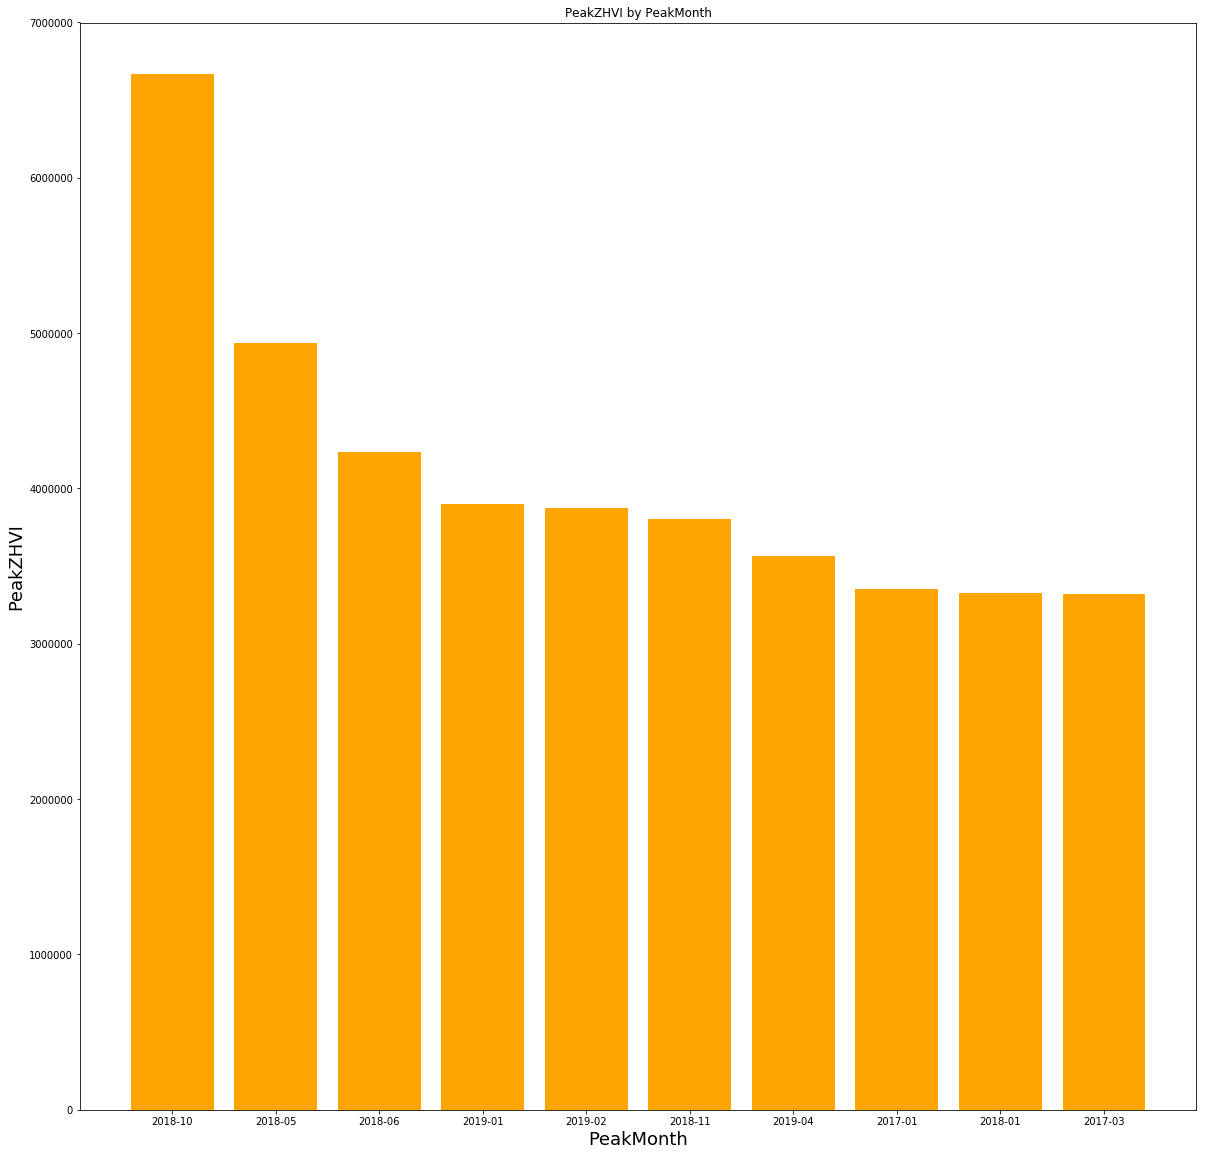

In [136]:
plt.figure(figsize=(20,20))
plt.bar(resulte,resultf,color=["orange"])
plt.xlabel("PeakMonth",fontsize=18)
plt.ylabel("PeakZHVI",fontsize=18)
plt.title("PeakZHVI by PeakMonth")
plt.show()

# EXTRACTING THE RELEVANT COLUMN MoM AND CREATING THE RDD

In [52]:
result7=spark.sql("select MoM from Dataset1 ")
resultg=result7.rdd.map(lambda row : row.MoM).collect()


# CREATING A HISTOGRAM FOR MoM(Month to Month Growth)

(array([8.0000e+00, 2.3000e+01, 9.0000e+01, 4.3600e+02, 2.9860e+03,
        1.0403e+04, 1.4390e+03, 1.2200e+02, 1.5000e+01, 8.0000e+00]),
 array([-0.06156275, -0.05051758, -0.03947242, -0.02842726, -0.01738209,
        -0.00633693,  0.00470823,  0.0157534 ,  0.02679856,  0.03784372,
         0.04888889]),
 <a list of 10 Patch objects>)

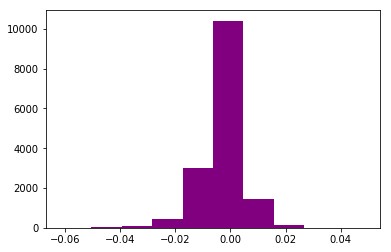

In [53]:
plt.hist(resultg,color=["purple"])

# EXTRACTING THE RELEVANT COLUMN QoQ AND CREATING THE RDD

In [54]:
result8=spark.sql("select QoQ from Dataset1 ")
resulth=result8.rdd.map(lambda row : row.QoQ).collect()


# CREATING A HISTOGRAM FOR QoQ(Quarter to Quarter Growth)

(array([1.300e+01, 2.300e+01, 1.220e+02, 6.580e+02, 4.406e+03, 8.659e+03,
        1.482e+03, 1.350e+02, 2.600e+01, 6.000e+00]),
 array([-0.1238938 , -0.10006615, -0.07623849, -0.05241083, -0.02858317,
        -0.00475551,  0.01907215,  0.04289981,  0.06672747,  0.09055513,
         0.11438279]),
 <a list of 10 Patch objects>)

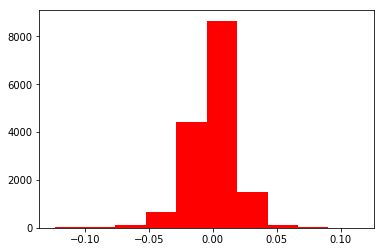

In [55]:
plt.hist(resulth,color=["red"])

# EXTRACTING THE RELEVANT COLUMN YoY AND CREATING THE RDD

In [56]:
result9=spark.sql("select YoY from Dataset1 ")
resulti=result9.rdd.map(lambda row : row.YoY).collect()

# CREATING A HISTOGRAM FOR YoY(Year to Year Growth)

(array([1.200e+01, 5.500e+01, 3.300e+02, 2.540e+03, 8.047e+03, 3.601e+03,
        7.630e+02, 1.500e+02, 2.600e+01, 6.000e+00]),
 array([-0.22645099, -0.16667354, -0.10689609, -0.04711864,  0.01265881,
         0.07243627,  0.13221372,  0.19199117,  0.25176862,  0.31154607,
         0.37132353]),
 <a list of 10 Patch objects>)

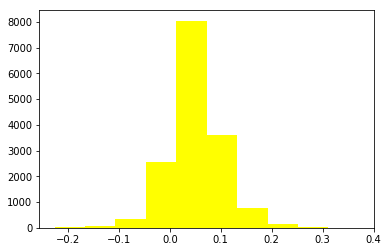

In [57]:
plt.hist(resulti,color=['yellow'])

# EXTRACTING THE RELEVANT COLUMN 5YEAR AND CREATING THE RDD

In [58]:
result10=spark.sql("select 5Year AS Year5 from Dataset1 ")
resultj=result10.rdd.map(lambda row : row.Year5).collect()

# CREATING A HISTOGRAM FOR 5YEAR

(array([1.000e+01, 1.500e+02, 3.419e+03, 7.446e+03, 3.523e+03, 7.980e+02,
        1.630e+02, 1.800e+01, 2.000e+00, 1.000e+00]),
 array([-0.07605853, -0.0396635 , -0.00326846,  0.03312657,  0.0695216 ,
         0.10591664,  0.14231167,  0.1787067 ,  0.21510174,  0.25149677,
         0.28789181]),
 <a list of 10 Patch objects>)

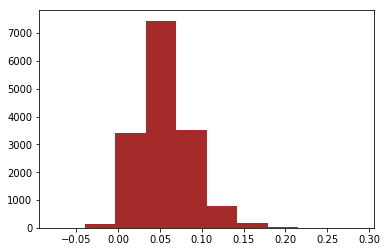

In [59]:
plt.hist(resultj,color=['brown'])

# EXTRACTING THE RELEVANT COLUMN 10YEAR AND CREATING THE RDD

In [60]:
result11=spark.sql("select 10Year AS Year10 from Dataset1 ")
resultk=result11.rdd.map(lambda row : row.Year10).collect()

# CREATING A HISTOGRAM FOR 10YEAR

(array([3.000e+00, 2.600e+01, 1.770e+02, 2.447e+03, 5.151e+03, 4.945e+03,
        2.145e+03, 5.240e+02, 1.000e+02, 1.200e+01]),
 array([-0.06794921, -0.04966714, -0.03138506, -0.01310298,  0.00517909,
         0.02346117,  0.04174325,  0.06002532,  0.0783074 ,  0.09658948,
         0.11487155]),
 <a list of 10 Patch objects>)

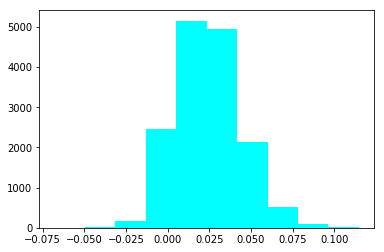

In [61]:
plt.hist(resultk,color=['Aqua'])

# CONVERTING THE ORGIGINAL DATASET TO PANDAS DATAFRAME

In [63]:
dataset11=dataset.toPandas()

# PLOTTING THE MoM VALUES VS STATE

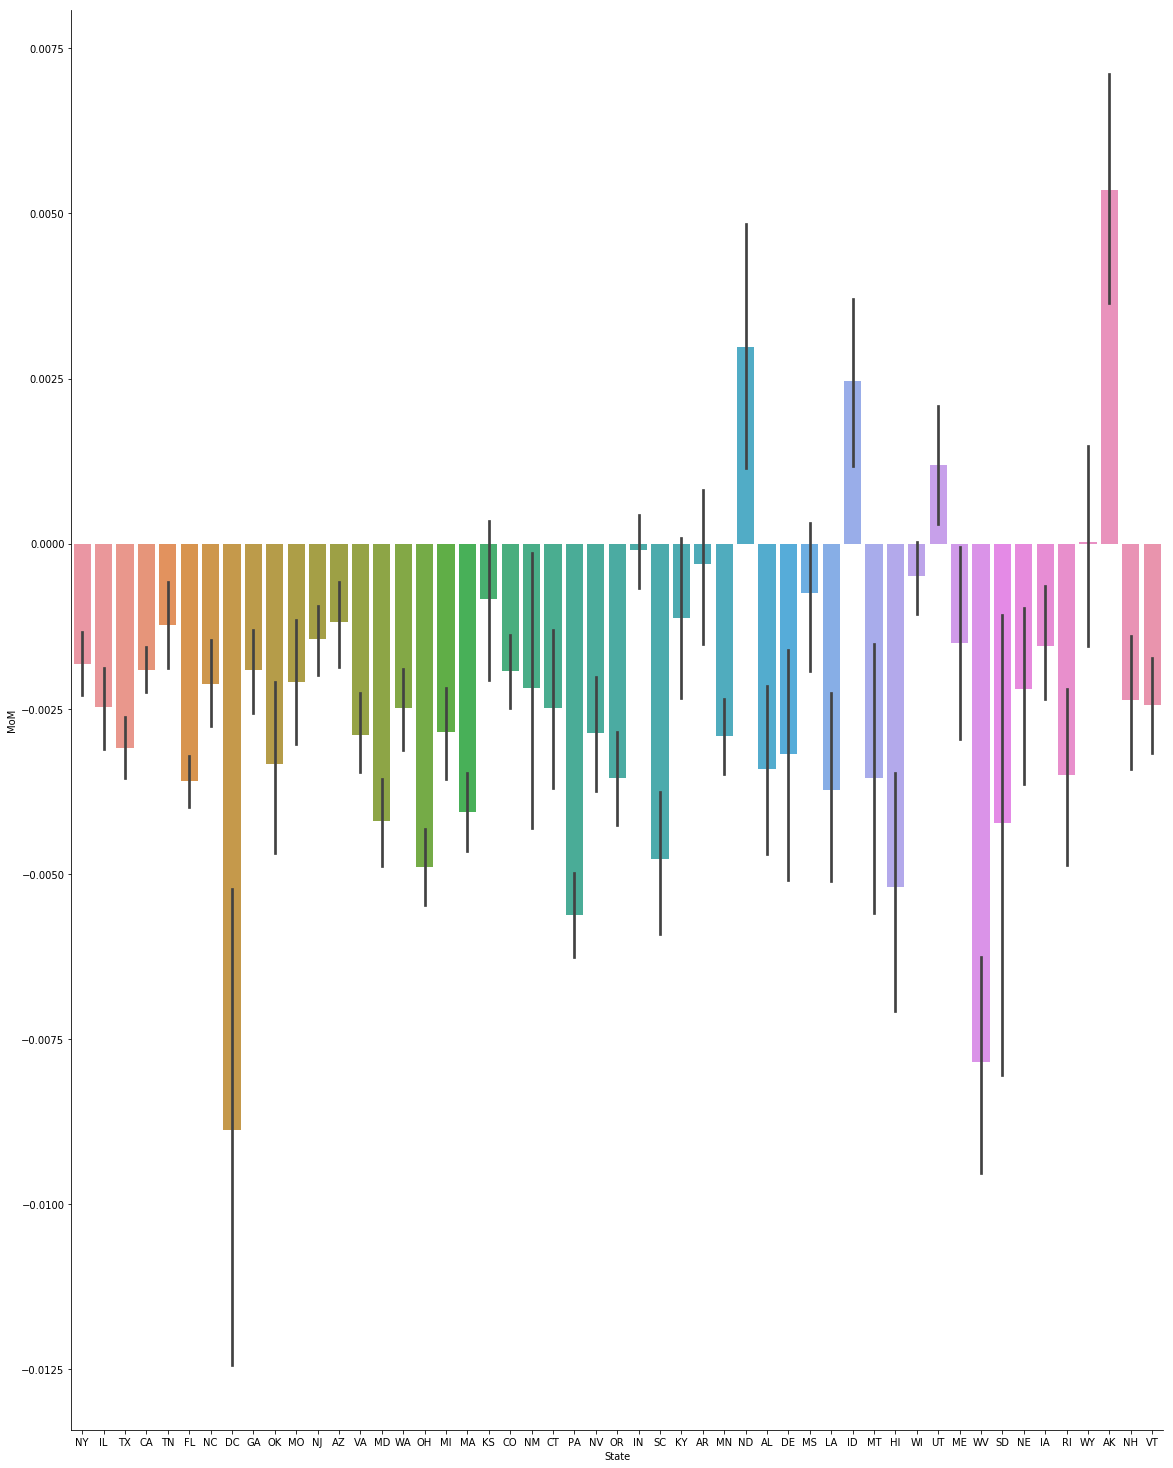

In [64]:
g=sns.catplot(x="State", y="MoM",data=dataset11, kind="bar",height=20.5, aspect=0.8)

# PLOTTING THE QoQ VALUES VS STATE

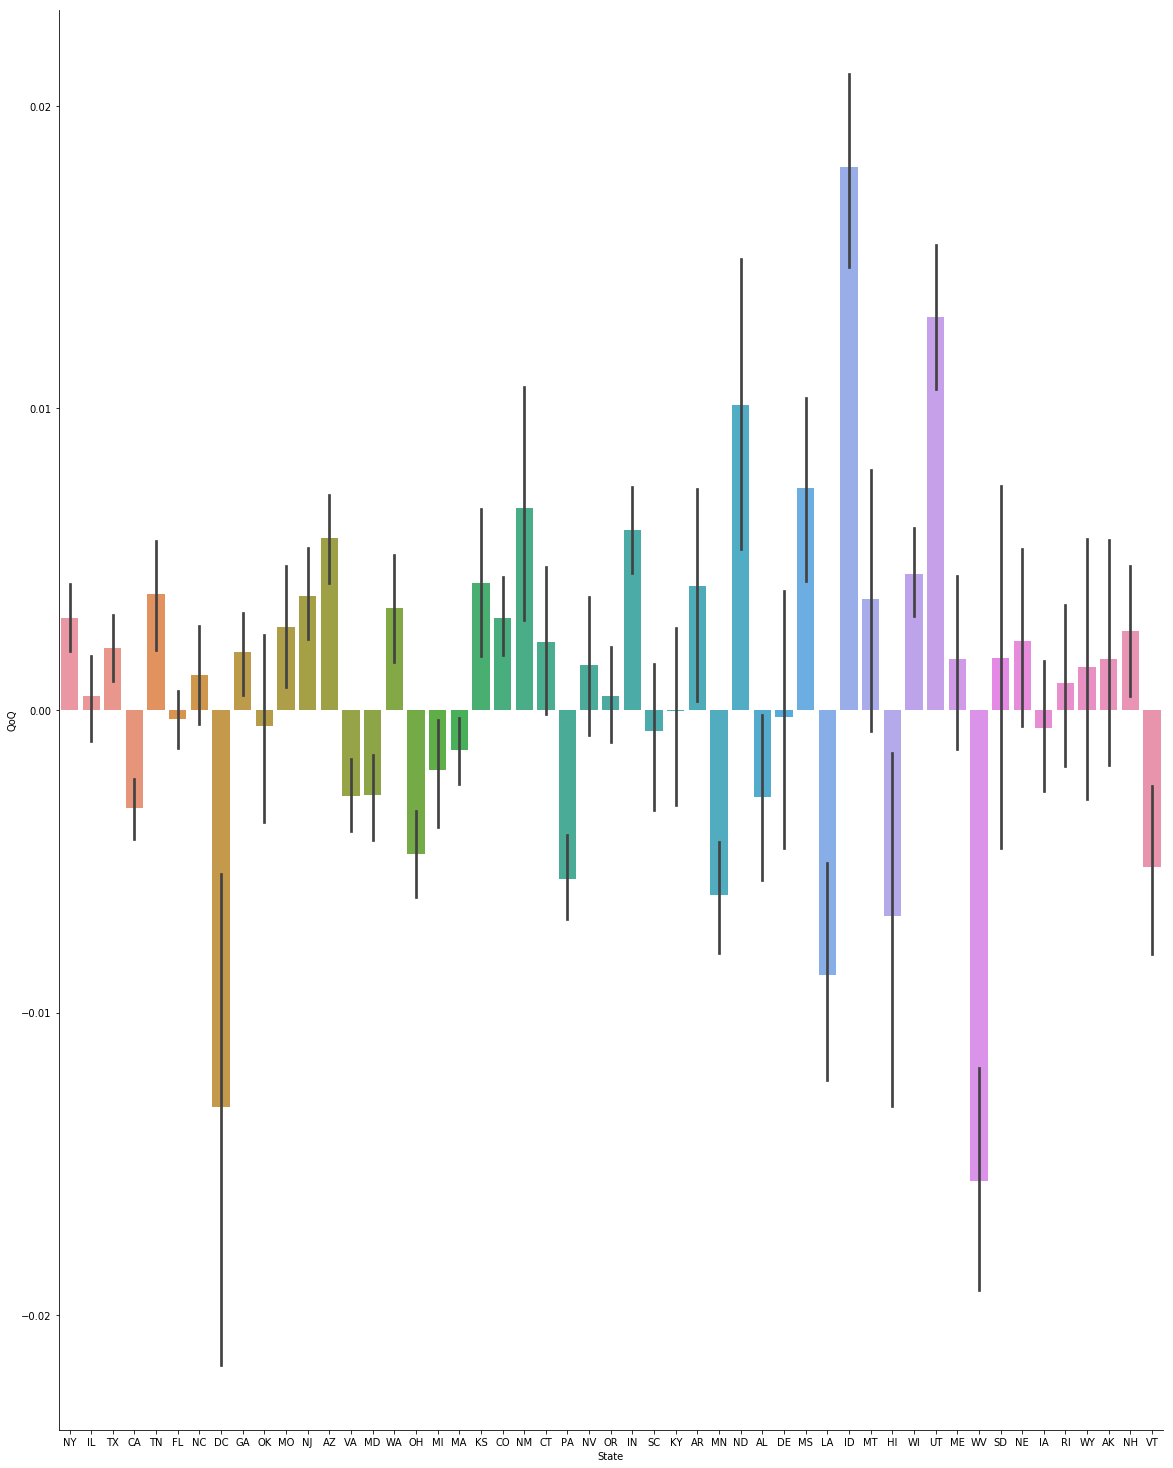

In [66]:
h=sns.catplot(x="State", y="QoQ",data=dataset11, kind="bar",height=20.5, aspect=0.8)

# PLOTTING THE YoY VALUES VS STATE

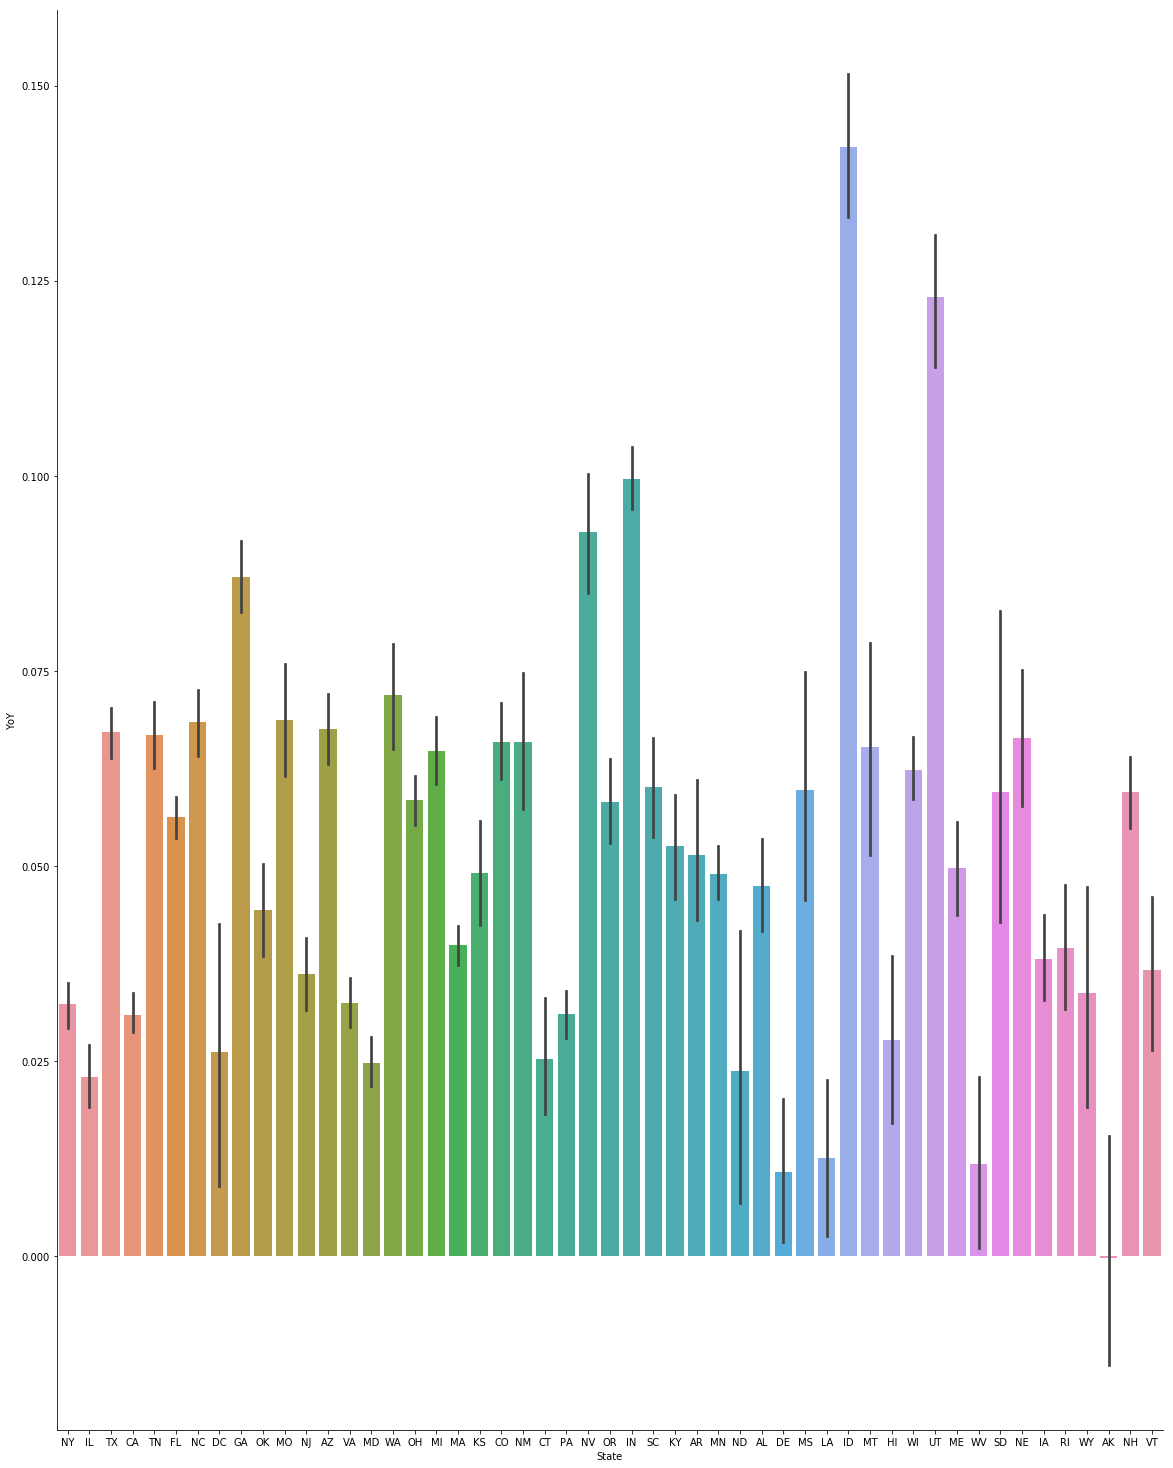

In [67]:
f=sns.catplot(x="State", y="YoY",data=dataset11, kind="bar",height=20.5, aspect=0.8)

# PLOTTING THE 5YEAR VALUES VS STATE

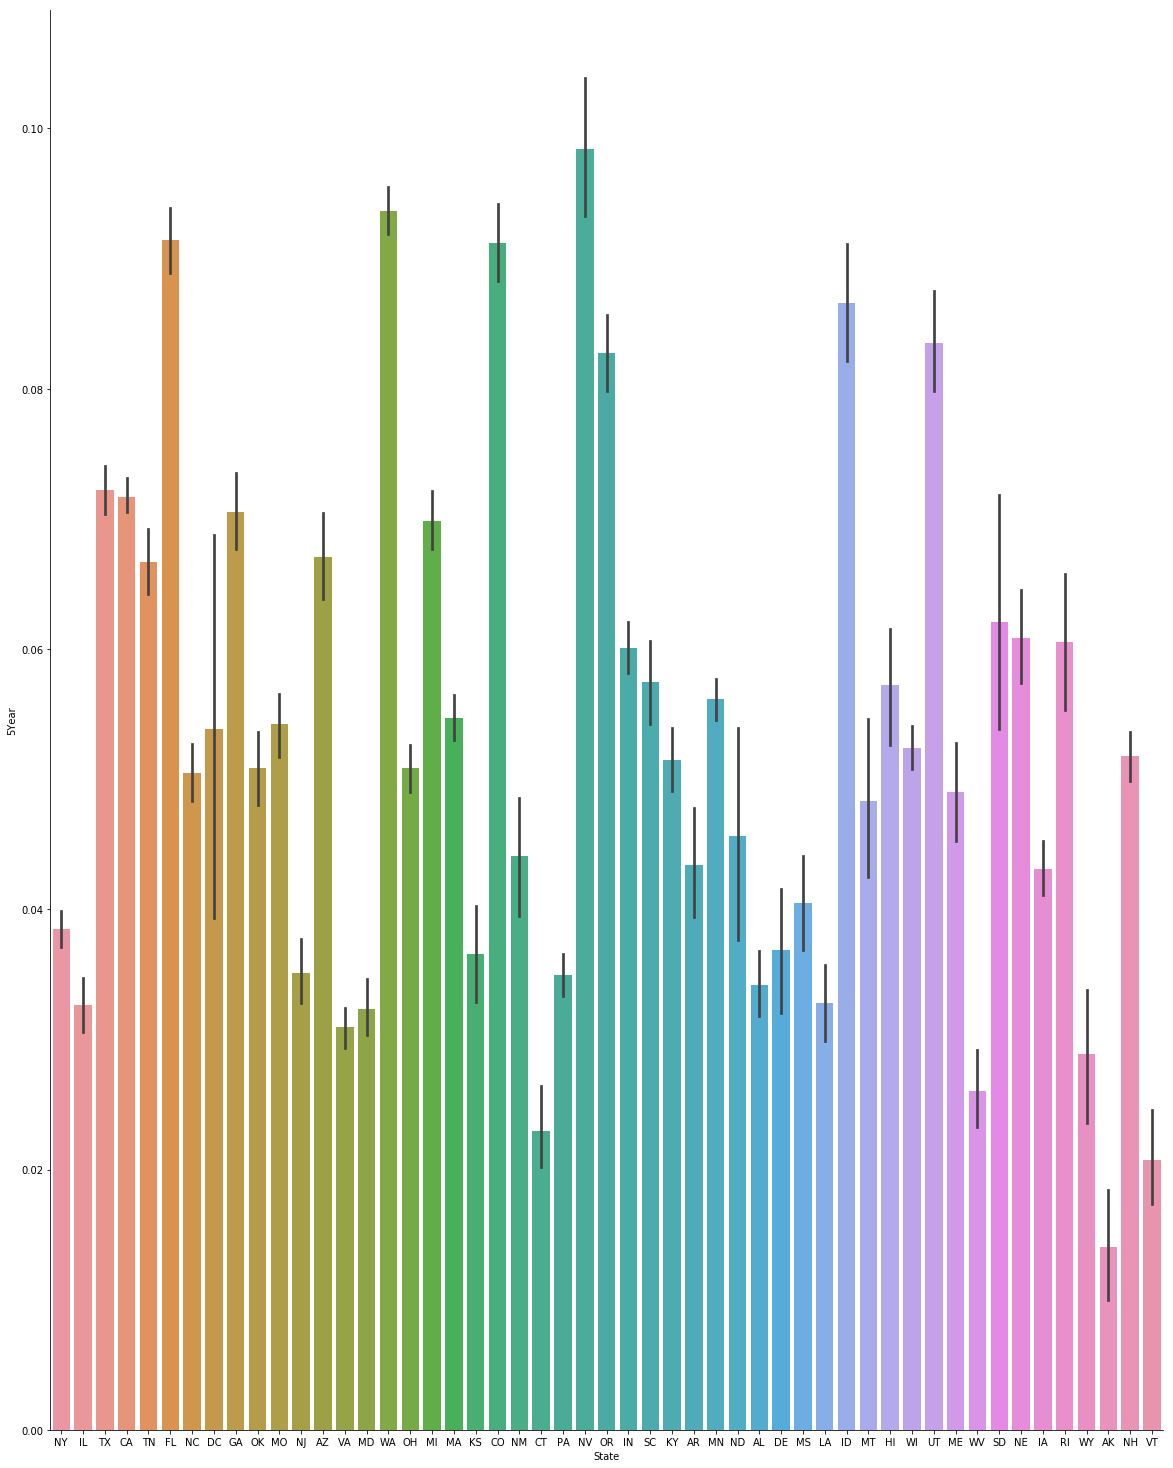

In [68]:
g=sns.catplot(x="State", y="5Year",data=dataset11, kind="bar",height=20.5, aspect=0.8)

# PLOTTING THE 10YEAR VALUES VS STATE

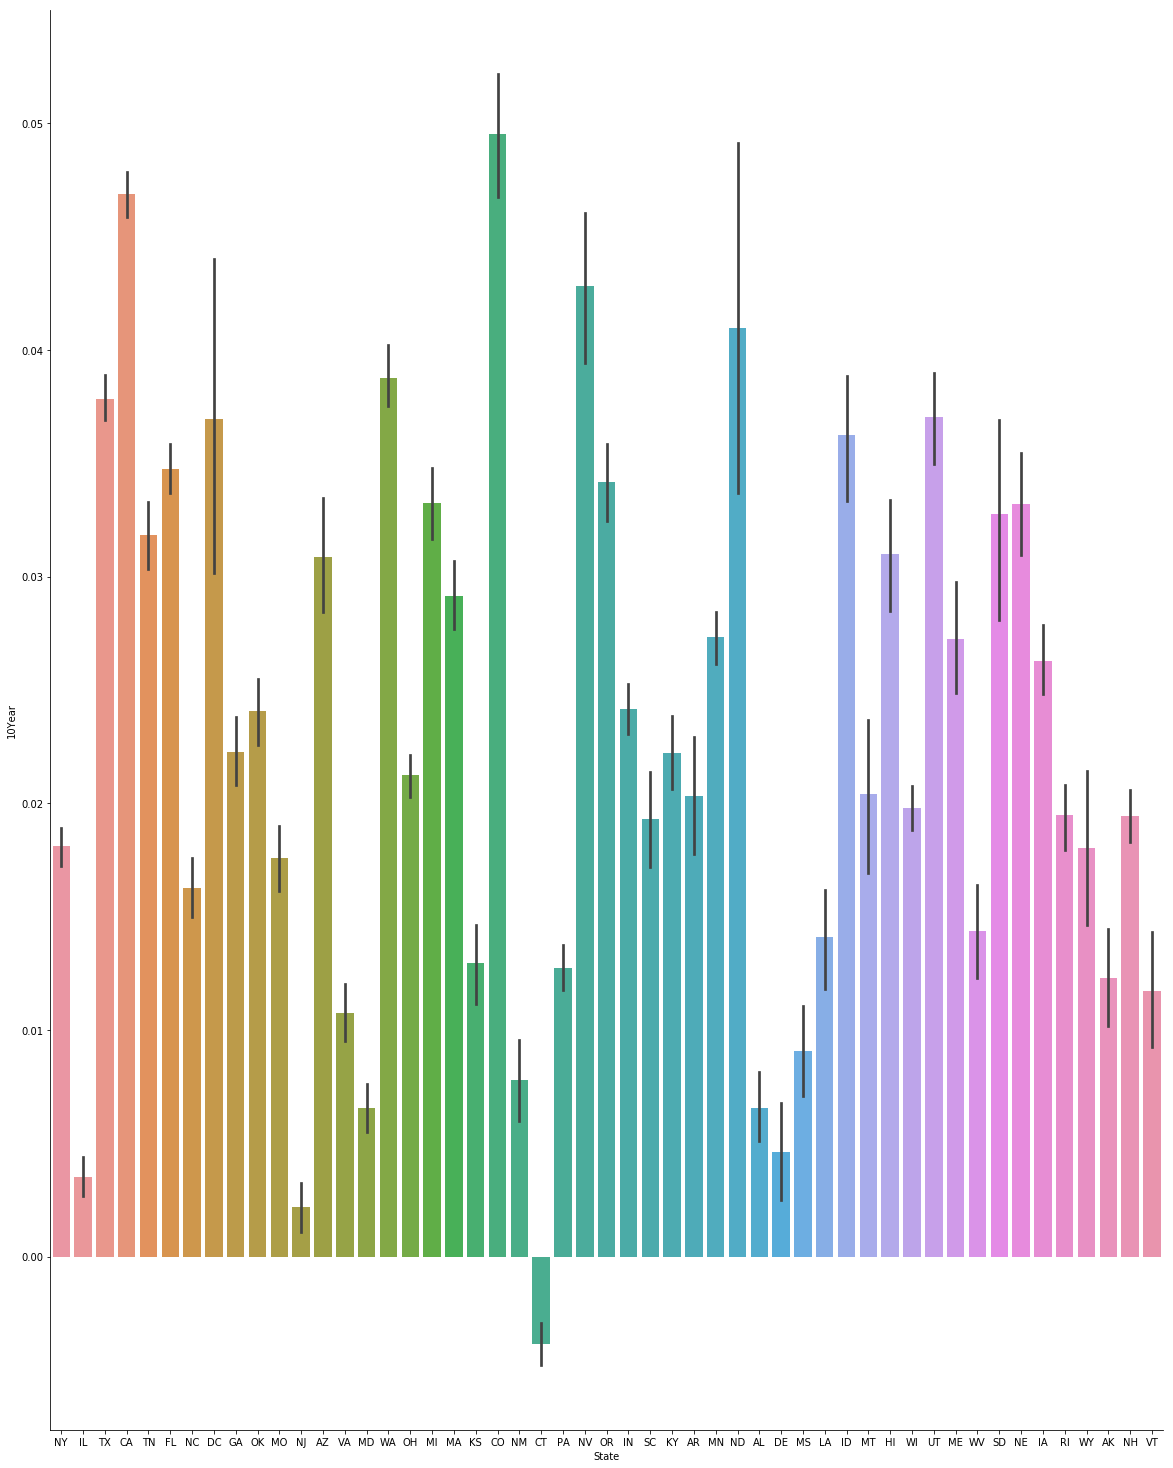

In [170]:
j=sns.catplot(x="State", y="10Year",data=dataset11, kind="bar",height=20.5, aspect=0.8)

# DROPPING THE NONRELEVANT COLUMNS TO BUILD THE GRADIENT BOOSTING MACHINE LEARNING MODEL

In [69]:
dataset2 = dataset.drop("Date").drop("State").drop("Metro").drop("County").drop("City").drop("PeakMonth").drop("PeakQuarter").drop("LastTimeAtCurrZHVI")
display(dataset2)

DataFrame[RegionID: int, RegionName: int, SizeRank: int, Zhvi: int, MoM: float, QoQ: float, YoY: float, 5Year: float, 10Year: float, PeakZHVI: int, PctFallFromPeak: float]

# IMPORTING THE RELEVANT LIBRARIES FOR FEATURE ASSEMBLING

In [70]:
from pyspark.ml.feature import VectorAssembler, VectorIndexer
featuresCols = dataset2.columns
featuresCols.remove('PeakZHVI')
# This concatenates all feature columns into a single feature vector in a new column "rawFeatures".
vectorAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures")
# This identifies categorical features and indexes them.
vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features")

# BUILDING THE GRADIENT BOOSTING MACHINE LEARNING MODEL TO PREDICT THE PEAK ZHVI VALUE.

In [71]:
from pyspark.ml.regression import GBTRegressor
# Takes the "features" column and learns to predict "cnt"
gbt = GBTRegressor(labelCol="PeakZHVI")

# IMPLEMENTING CROSS VALIDATION TO FINE TUNE THE MODEL

In [72]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
# Define a grid of hyperparameters to test:
#  - maxDepth: max depth of each decision tree in the GBT ensemble
#  - maxIter: iterations, i.e., number of trees in each GBT ensemble
# In this example notebook, we keep these values small.  In practice, to get the highest accuracy, you would likely want to try deeper trees (10 or higher) and more trees in the ensemble (>100).
paramGrid = ParamGridBuilder()\
  .addGrid(gbt.maxDepth, [2, 5])\
  .addGrid(gbt.maxIter, [10, 100])\
  .build()
# We define an evaluation metric.  This tells CrossValidator how well we are doing by comparing the true labels with predictions.
evaluator = RegressionEvaluator(metricName="r2", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())
# Declare the CrossValidator, which runs model tuning for us.
cv = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)

# PIPELINING THE MODEL

In [73]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, vectorIndexer, cv])

# DIVIDING THE DATA INTO TRAINING AND TESTING

In [74]:
train, test = dataset2.randomSplit([0.7, 0.3])
#print "We have %d training examples and %d test examples." % (train.count(), test.count())

In [75]:
pipelineModel = pipeline.fit(train)

In [76]:
predictions = pipelineModel.transform(test)

In [77]:
predictions.show()

+--------+----------+--------+------+------------+------------+------------+-----------+------------+--------+---------------+--------------------+--------------------+------------------+
|RegionID|RegionName|SizeRank|  Zhvi|         MoM|         QoQ|         YoY|      5Year|      10Year|PeakZHVI|PctFallFromPeak|         rawFeatures|            features|        prediction|
+--------+----------+--------+------+------------+------------+------------+-----------+------------+--------+---------------+--------------------+--------------------+------------------+
|   58196|      1001|    6017|214700|  4.65983E-4| -0.00232342| 0.019952495|0.041381903| 0.013476413|  215200|    -0.00232342|[58196.0,1001.0,6...|[58196.0,1001.0,6...|222836.86187197542|
|   58197|      1002|    4198|337600|-0.001774098| 0.005360334|  0.03717358|0.033730384| 0.013442691|  338200|   -0.001774098|[58197.0,1002.0,4...|[58197.0,1002.0,4...|330274.28784397535|
|   58201|      1007|    6938|275800|-0.006126126|-0.0111150

# DETERMINING THE MODEL ACCURACY

In [79]:
r2 = evaluator.evaluate(predictions)
r2

0.9543698725473727

# THE ACCURACY OF THE GRADIENT BOOSTING MACHINE LEARNING MODEL IS 95% WHICH MEANS THE MODEL IS QUITE EFFICIENT IN PREDICTING THE PEAKZHVI VALUES